In [1]:
#!pip install -U spacy
#!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

import pandas as pd
import en_core_web_sm
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

In [1]:
%run import_file.ipynb

Python version is 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Pandas version is 1.0.1
C:/Users/20193703/Documents/University/Data challenge/CSV/full_basic_with_sentiment.csv


C:\Users\20193703\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3,5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0        int64
_id              object
created_at       object
id               object
id_str          float64
text             object
user.id_str     float64
lang             object
timestamp_ms    float64
sentiment         int64
dtype: object
Please specify your DataFrame name: df_sentiment
created_at converted to string, use timestamp for datetime dtype
Skip id, use id_str instead
timestamp converted to datetime dtype
Dtypes after transformation:
 Unnamed: 0               int64
created_at              object
id                      object
id_str                   Int64
text                    object
user.id_str              Int64
lang                    object
timestamp_ms    datetime64[ns]
sentiment                Int64
dtype: object


In [2]:
df_text = df_sentiment['text']
df_text.dropna(inplace = True)
df_result= df_text.to_frame()

## Translate, clean and tokenize the tweets

In [3]:
import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English
parser = English()
def tokenize_trans(text):
    '''Tokenize and translate the inserted text''' 
    tokens_trans = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            tokens_trans.append('URL')
        elif token.orth_.startswith('@'):
            tokens_trans.append('SCREEN_NAME')
        else:
            tokens_trans.append(token.lower_)
    return tokens_trans

In [4]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
def get_rootword(word):
    """Changes a  word to its rootword"""
    root = wn.morphy(word)
    if root is None:
        return word
    else:
        return root


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\20193703\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\20193703\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def preprocess_text(text):
    """Combines other functions to return the tokens"""
    tokens = tokenize_trans(text) #deletes url, hashtags and @
    tokens = [token for token in tokens if len(token) > 4] #checks if word is > 5
    tokens = [token for token in tokens if token not in en_stop] #checks if word is not a stopword
    tokens = [get_rootword(token) for token in tokens] #swaps the token to its rootword
    return tokens

In [8]:
data_text = []
for line in df_text:
    tokens = preprocess_text(line)
    #print(tokens)
    data_text.append(tokens)

## Topic Modelling using a Library

In [9]:
#!pip install --upgrade gensim
#from gensim import corpora
#dictionary = corpora.Dictionary(data_text)

In [10]:
#corpus = [dictionary.doc2bow(text) for text in data_text]


KeyboardInterrupt: 

In [ ]:
#import pickle
#pickle.dump(corpus, open('corpus.pkl', 'wb'))


In [ ]:
#import gensim
#NUM_TOPICS = 5
#ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

In [ ]:
#topics = ldamodel.print_topics(num_words=6)
#for topic in topics:
    #print(topic)

In [ ]:
#top_topics = ldamodel.top_topics(corpus)

In [ ]:
#from pprint import pprint
#pprint(top_topics)

## Topic classification

In [9]:
topic_baggage = ['baggage', 'luggage']
topic_delay = ['delay']
topic_poluttion = ['pollute']
topic_cancel = ['cancel']
topic_service = ['service']
topic_ticket = ['ticket']
topic_corona = ['corona']

In [10]:
index = 0
import time
df_result['Topic'] = ''
df_result['Baggage'] = 0
df_result['Delay'] = 0
df_result['Pollution'] = 0
df_result['Cancel'] = 0
df_result['Service'] = 0
df_result['Ticket'] = 0
df_result['Corona'] = 0





start = time.time_ns() // 1000000

for l in data_text:
    s = ""
    if topic_baggage[0] in l:
        s = s +'1'
    if topic_baggage[1] in l:
        s = s +'1'
    if topic_delay[0] in l:
        s = s +'2'
    if topic_poluttion[0] in l:
        s = s +'3'
    if topic_cancel[0] in l:
        s = s + '4'
    if topic_service[0] in l:
        s = s +'5'
    if topic_ticket[0] in l:
        s = s +'6'
    if topic_corona[0] in l:
        s = s +'7'
    df_result['Topic'].iat[index] = s
    
    
    if topic_baggage[0] in l:
        df_result['Baggage'].iat[index] = 1
    if topic_baggage[1] in l:
        df_result['Baggage'].iat[index] = 1
    if topic_delay[0] in l:
        df_result['Delay'].iat[index] = 1
    if topic_poluttion[0] in l:
        df_result['Pollution'].iat[index] = 1
    if topic_cancel[0] in l:
        df_result['Cancel'].iat[index] = 1
    if topic_service[0] in l:
         df_result['Service'].iat[index] = 1
    if topic_ticket[0] in l:
        df_result['Ticket'].iat[index] = 1
    if topic_corona[0] in l:
         df_result['Corona'].iat[index] = 1
    index = index + 1
end = time.time_ns() // 1000000
print(end - start)

62277


In [11]:
df_result['id_str'] = df['id_str']

In [12]:
topic_dict = {
    '1' : 'baggage',
    '2' : 'delay',
    '3' : 'pollute',
    '4' : 'cancel',
    '5' : 'service',
    '6' : 'ticket',
    '7' : 'corona'
}

In [13]:
df_result['Topic'].value_counts()

        6300364
4        177343
2        134249
5         89709
1         62179
6         53402
7         17714
24         8517
45         5238
46         4924
12         4498
25         3572
15         2140
16          966
11          938
56          922
14          651
26          635
3           520
47          511
245         184
125         173
67          136
456          83
467          82
124          79
112          76
145          31
57           30
115          29
246          25
27           13
156          12
126          11
116          10
256           7
167           7
114           6
457           5
146           5
1245          4
17            2
1125          2
257           1
37            1
567           1
147           1
Name: Topic, dtype: int64

In [14]:
df_plot = df_result.replace('', float('NaN')).sort_values(by= 'Topic')
df_plot['Topic']


5946556      1
3811929      1
3811907      1
5868482      1
4362259      1
          ... 
7527681    NaN
7527682    NaN
7527683    NaN
7527684    NaN
7527685    NaN
Name: Topic, Length: 6870008, dtype: object

In [18]:
topic_1_perc = (6689/38035)*100
topic_2_perc = (11096/38035)*100
topic_3_perc = (289/38035)*100
topic_4_perc = (8198/38035)*100
topic_5_perc = (11763/38035)*100

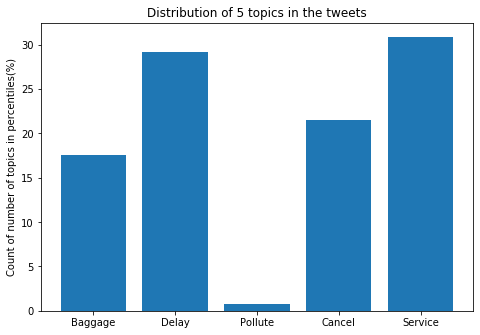

In [138]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
topics = ['Baggage', 'Delay', 'Pollute', 'Cancel', 'Service']
counts = [topic_1_perc,topic_2_perc,topic_3_perc,topic_4_perc,topic_5_perc]
ax.bar(topics,counts)
ax.set_ylabel('Count of number of topics in percentiles(%)')
ax.set_title('Distribution of 5 topics in the tweets')
plt.show()

In [17]:
#ax.get_figure().savefig('dist2.png')
df_result.shape

(6870008, 10)

In [18]:

export = df_result.drop('text', axis = 1)

In [19]:
export.to_csv('topic_id2.csv')